In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/catbreed/Capstone/American Shorthair/42856747_7633.jpg
/kaggle/input/catbreed/Capstone/American Shorthair/42320279_8479.jpg
/kaggle/input/catbreed/Capstone/American Shorthair/44761724_4800.jpg
/kaggle/input/catbreed/Capstone/American Shorthair/44962251_4434.jpg
/kaggle/input/catbreed/Capstone/American Shorthair/41494969_9771.jpg
/kaggle/input/catbreed/Capstone/American Shorthair/41512227_9758.jpg
/kaggle/input/catbreed/Capstone/American Shorthair/41542811_9713.jpg
/kaggle/input/catbreed/Capstone/American Shorthair/45221458_3884.jpg
/kaggle/input/catbreed/Capstone/American Shorthair/43199666_7037.jpg
/kaggle/input/catbreed/Capstone/American Shorthair/43911620_5897.jpg
/kaggle/input/catbreed/Capstone/American Shorthair/42147069_8758.jpg
/kaggle/input/catbreed/Capstone/American Shorthair/42320497_8474.jpg
/kaggle/input/catbreed/Capstone/American Shorthair/44223172_5510.jpg
/kaggle/input/catbreed/Capstone/American Shorthair/41948204_9113.jpg
/kaggle/input/catbreed/Capstone/Am

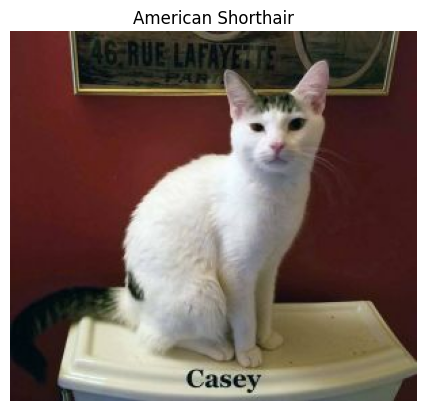

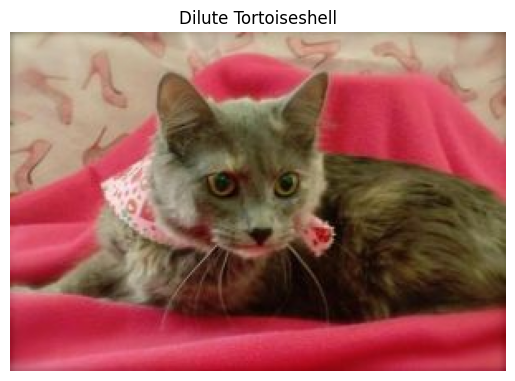

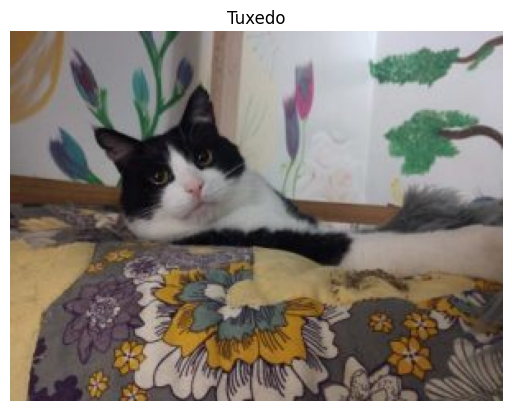

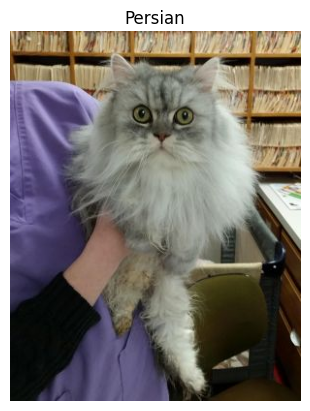

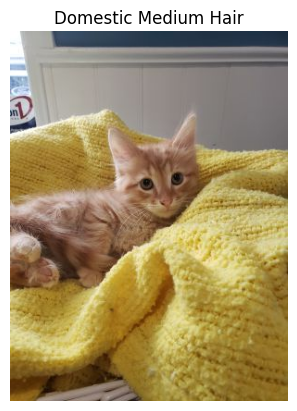

In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data_dir = '/kaggle/input/catbreed/Capstone'  # Directory path where the folders are located

# Get the list of folders in the directory
folders = os.listdir(data_dir)

# Iterate over each folder
for folder in folders:
    folder_path = os.path.join(data_dir, folder)  # Path of the current folder
    images = os.listdir(folder_path)  # Get the list of images in the folder
    
    if len(images) > 0:
        # Get the path of the first image in the folder
        image_path = os.path.join(folder_path, images[0])
        
        # Display the image
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.title(folder)  # Display the folder name as the title
        plt.axis('off')  # Hide the axis
        plt.show()


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to the dataset
data_dir = '/kaggle/input/catbreed/Capstone'

# Set the parameters for training the model
batch_size = 32
image_size = (128, 128)
input_shape = (128, 128, 3)
num_classes = 5
epochs = 10


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
# Preprocess and augment the data
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [7]:
# Load and split the data into training and validation sets
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 12000 images belonging to 5 classes.


In [8]:
valid_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 3000 images belonging to 5 classes.


In [9]:
# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [12]:
# Print the details of the data generators
print("Training Generator:")
print("Number of samples:", train_generator.samples)
print("Number of classes:", train_generator.num_classes)
print("Class labels:", train_generator.class_indices)
print()

print("Validation Generator:")
print("Number of samples:", valid_generator.samples)
print("Number of classes:", valid_generator.num_classes)
print("Class labels:", valid_generator.class_indices)

Training Generator:
Number of samples: 12000
Number of classes: 5
Class labels: {'American Shorthair': 0, 'Dilute Tortoiseshell': 1, 'Domestic Medium Hair': 2, 'Persian': 3, 'Tuxedo': 4}

Validation Generator:
Number of samples: 3000
Number of classes: 5
Class labels: {'American Shorthair': 0, 'Dilute Tortoiseshell': 1, 'Domestic Medium Hair': 2, 'Persian': 3, 'Tuxedo': 4}


In [13]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)

Epoch 1/10
375/375 [==============================] - 189s 500ms/step - loss: 1.4844 - accuracy: 0.3283 - val_loss: 1.4027 - val_accuracy: 0.4036
Epoch 2/10
375/375 [==============================] - 173s 462ms/step - loss: 1.4245 - accuracy: 0.3682 - val_loss: 1.3941 - val_accuracy: 0.4005
Epoch 3/10
375/375 [==============================] - 175s 465ms/step - loss: 1.4142 - accuracy: 0.3801 - val_loss: 1.3603 - val_accuracy: 0.4150
Epoch 4/10
375/375 [==============================] - 179s 476ms/step - loss: 1.4013 - accuracy: 0.3891 - val_loss: 1.3425 - val_accuracy: 0.4281
Epoch 5/10
375/375 [==============================] - 176s 470ms/step - loss: 1.3931 - accuracy: 0.3968 - val_loss: 1.3759 - val_accuracy: 0.4210
Epoch 6/10
375/375 [==============================] - 175s 465ms/step - loss: 1.3815 - accuracy: 0.4058 - val_loss: 1.3435 - val_accuracy: 0.4220
Epoch 7/10
375/375 [==============================] - 175s 466ms/step - loss: 1.3622 - accuracy: 0.4283 - val_loss: 1.3409 -